In [1]:
import json
from pprint import pprint

In [3]:
with open("successful_csvs_poly_palr.json") as f:
    data = json.load(f)

In [4]:
for key in data:
    for item in data[key]:
        print(key, item, len(data[key][item]))


openrouter/meta-llama/llama-3.1-8b-instruct polynomial.py.TestPolynomial 3
openrouter/meta-llama/llama-3.1-8b-instruct palindrome.py.TestPalindrome 0
openrouter/meta-llama/llama-3.1-8b-instruct palindrome_random.py.TestPalindromeRandom 5


In [5]:
import pandas as pd
from io import StringIO
import numpy as np

In [16]:
import numpy as np
import pandas as pd
import sympy as sp

# Set random seed for reproducibility
np.random.seed(42)


# Function to generate a random polynomial term
def generate_term():
    coefficient = np.random.randint(-10, 11)
    while coefficient == 0:  # Avoid zero coefficients
        coefficient = np.random.randint(-10, 11)

    power = np.random.randint(0, 5)  # Powers from 0 to 4

    if power == 0:
        return str(coefficient)
    elif power == 1:
        if coefficient == 1:
            return "x"
        elif coefficient == -1:
            return "-x"
        else:
            return f"{coefficient}*x"
    else:
        if coefficient == 1:
            return f"x**{power}"
        elif coefficient == -1:
            return f"-x**{power}"
        else:
            return f"{coefficient}*x**{power}"


# Function to generate a polynomial with n terms
def generate_polynomial(n_terms):
    terms = [generate_term() for _ in range(n_terms)]
    # Join terms with + or - signs
    polynomial = terms[0]
    for term in terms[1:]:
        if term.startswith("-"):
            polynomial += f" {term}"
        else:
            polynomial += f" + {term}"
    return polynomial


# Function to generate product of polynomials
def generate_product():
    # Generate two polynomials with 1-3 terms each
    poly1 = generate_polynomial(np.random.randint(1, 4))
    poly2 = generate_polynomial(np.random.randint(1, 4))

    # Format as product
    return f"({poly1})*({poly2})"


# Function to evaluate polynomial expression at a given x
def evaluate_expression(expr_str, x_val):
    x = sp.Symbol("x")
    # No need to replace ^ with ** since we're using ** in generation
    expr = sp.sympify(expr_str)
    result = expr.subs(x, x_val)
    return int(result) if result.is_integer else float(result)


# Generate data
n_samples = 100
expressions = []
x_values = []
correct_answers = []

for _ in range(n_samples):
    # Decide between single polynomial or product
    if np.random.random() < 0.5:
        expr = generate_polynomial(np.random.randint(2, 5))
    else:
        expr = generate_product()

    # Choose an integer x value between -10 and 10
    x_val = np.random.randint(-10, 11)

    # Calculate the correct answer
    answer = evaluate_expression(expr, x_val)

    expressions.append(expr)
    x_values.append(x_val)
    correct_answers.append(answer)

# Create questions
questions = [
    f"Evaluate the polynomial {expr} at x = {x_val}. Provide only the integer result."
    for expr, x_val in zip(expressions, x_values)
]

# Create dataframe
df = pd.DataFrame(
    {
        "question": questions,
        "answer": correct_answers,
    }
)

# Save to CSV
df.to_csv("polynomial_evaluation_benchmark.csv", index=False)

# Display a few examples
print(df.head())

                                            question  answer
0  Evaluate the polynomial 4*x**2 -3*x**4 at x = ...  -29600
1  Evaluate the polynomial 10*x**3 -3*x**2 + 10*x...    9810
2  Evaluate the polynomial (1 + 6*x**2)*(-x**3 + ...  123200
3  Evaluate the polynomial (10 -4*x -7)*(7*x -2*x...   -1850
4  Evaluate the polynomial -4*x**3 -3*x**2 + 3 -7...     105


In [7]:
df = pd.read_csv(
    StringIO(
        data["openrouter/meta-llama/llama-3.1-8b-instruct"][
            "polynomial.py.TestPolynomial"
        ][-1]
    )
)
df.head()

,question,answer
0,"What is the value of the polynomial [5, -10] a...",0
1,"What is the value of the polynomial [-7, -3, -...",-15882
2,"What is the value of the polynomial [-4, 2] at...",18
3,"What is the value of the polynomial [-9, -4, -...",220
4,"What is the value of the polynomial [7, -5] at...",58


In [10]:
def replace_dummy_data(csv_txt: str, path="../lm_eval/tasks/dummy_task/dummy_data.csv"):
    with open(path, "w") as f:
        f.write(csv_txt)


replace_dummy_data(
    data["openrouter/meta-llama/llama-3.1-8b-instruct"]["polynomial.py.TestPolynomial"][
        -1
    ]
)

In [12]:
%%bash
cd ..
for model in "meta-llama/llama-3.1-8b-instruct" "mistralai/mistral-small-3.1-24b-instruct" "meta-llama/llama-3.3-70b-instruct" "qwen/qwen3-235b-a22b" "deepseek/deepseek-chat-v3-0324"; do
    OPENAI_API_KEY=$OPENROUTER_API_KEY lm_eval --model openrouter-chat \
        --model_args model=$model,num_concurrent=64 \
        --tasks strawberry \
        --apply_chat_template \
        --output_path experimental-notebooks/polynomial-results-data=llama-3.1-8b-instruct
done

2025-05-14:16:00:13 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:00:13 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:00:13 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'meta-llama/llama-3.1-8b-instruct', 'num_concurrent': 64}
2025-05-14:16:00:13 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:00:13 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:00:13 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:00:13 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:00:13 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for

openrouter-chat (model=meta-llama/llama-3.1-8b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.17|±  |0.0378|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



2025-05-14:16:00:31 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:00:31 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:00:31 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'mistralai/mistral-small-3.1-24b-instruct', 'num_concurrent': 64}
2025-05-14:16:00:31 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:00:31 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:00:31 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:00:31 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:00:31 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readm

openrouter-chat (model=mistralai/mistral-small-3.1-24b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.42|±  |0.0496|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



2025-05-14:16:00:47 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:00:47 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:00:47 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'meta-llama/llama-3.3-70b-instruct', 'num_concurrent': 64}
2025-05-14:16:00:47 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:00:47 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:00:47 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:00:48 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:00:48 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md fo

openrouter-chat (model=meta-llama/llama-3.3-70b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.25|±  |0.0435|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



2025-05-14:16:01:45 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:01:45 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:01:45 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'qwen/qwen3-235b-a22b', 'num_concurrent': 64}
2025-05-14:16:01:45 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:01:45 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:01:45 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:01:45 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:01:45 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for details.
20

openrouter-chat (model=qwen/qwen3-235b-a22b,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  |    0|±  |     0|
|          |       |strict-match    |     0|exact_match|↑  |    0|±  |     0|



2025-05-14:16:02:34 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:02:34 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:02:34 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'deepseek/deepseek-chat-v3-0324', 'num_concurrent': 64}
2025-05-14:16:02:34 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:02:34 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:02:34 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:02:34 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:02:34 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for d

openrouter-chat (model=deepseek/deepseek-chat-v3-0324,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.22|±  |0.0416|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



In [17]:
# upload the gt data
replace_dummy_data(df.to_csv(index=False))

In [18]:
%%bash
cd ..
for model in "meta-llama/llama-3.1-8b-instruct" "mistralai/mistral-small-3.1-24b-instruct" "meta-llama/llama-3.3-70b-instruct" "qwen/qwen3-235b-a22b" "deepseek/deepseek-chat-v3-0324"; do
    OPENAI_API_KEY=$OPENROUTER_API_KEY lm_eval --model openrouter-chat \
        --model_args model=$model,num_concurrent=64 \
        --tasks strawberry \
        --apply_chat_template \
        --output_path experimental-notebooks/polynomial-results-data=gt
done

2025-05-14:16:19:26 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:19:26 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:19:26 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'meta-llama/llama-3.1-8b-instruct', 'num_concurrent': 64}
2025-05-14:16:19:26 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:19:26 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:19:26 INFO     [models.api_models:133] Using tokenizer None
Generating train split: 100 examples [00:00, 8377.21 examples/s]
2025-05-14:16:19:26 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:19:26 WARNING  [evaluator:461] Chat template formatting change affects loglikelihoo

openrouter-chat (model=meta-llama/llama-3.1-8b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.56|±  |0.0499|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



2025-05-14:16:19:50 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:19:50 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:19:50 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'mistralai/mistral-small-3.1-24b-instruct', 'num_concurrent': 64}
2025-05-14:16:19:50 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:19:50 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:19:50 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:19:50 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:19:50 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readm

openrouter-chat (model=mistralai/mistral-small-3.1-24b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.64|±  |0.0482|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



2025-05-14:16:20:10 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:20:10 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:20:10 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'meta-llama/llama-3.3-70b-instruct', 'num_concurrent': 64}
2025-05-14:16:20:10 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:20:10 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:20:10 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:20:11 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:20:11 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md fo

openrouter-chat (model=meta-llama/llama-3.3-70b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.66|±  |0.0476|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



2025-05-14:16:20:32 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:20:32 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:20:32 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'qwen/qwen3-235b-a22b', 'num_concurrent': 64}
2025-05-14:16:20:32 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:20:32 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:20:32 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:20:34 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:20:34 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for details.
20

openrouter-chat (model=qwen/qwen3-235b-a22b,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  |    0|±  |     0|
|          |       |strict-match    |     0|exact_match|↑  |    0|±  |     0|



2025-05-14:16:21:10 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:21:10 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:21:10 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'deepseek/deepseek-chat-v3-0324', 'num_concurrent': 64}
2025-05-14:16:21:10 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:21:10 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:21:10 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:21:11 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:21:11 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for d

openrouter-chat (model=deepseek/deepseek-chat-v3-0324,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.68|±  |0.0469|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



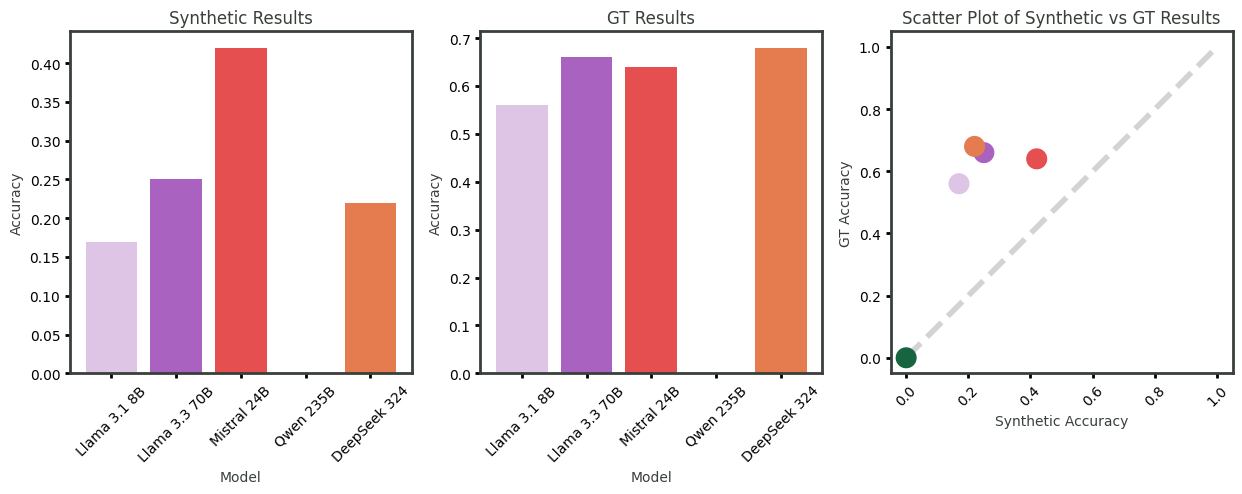

In [22]:
import matplotlib.pyplot as plt

synthetic_results = {
    "Llama 3.1 8B": 0.17,
    "Llama 3.3 70B": 0.25,
    "Mistral 24B": 0.42,
    "Qwen 235B": 0.0,
    "DeepSeek 324": 0.22,
}
gt_results = {
    "Llama 3.1 8B": 0.56,
    "Llama 3.3 70B": 0.66,
    "Mistral 24B": 0.64,
    "Qwen 235B": 0.0,
    "DeepSeek 324": 0.68,
}

background_color = "#FFFFFF"
text_and_border_color = "#384039"
model_colors = {
    "Llama 3.1 8B": "#DEC5E6",
    "Llama 3.3 70B": "#AA62C0",
    "Mistral 24B": "#E54F4F",
    "Qwen 235B": "#176440",
    "DeepSeek 324": "#E57C4F",
}

# make a plot of 2 bar charts then a scatter plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.set_facecolor(background_color)

for i in range(3):
    axs[i].set_facecolor(background_color)
    axs[i].tick_params(axis="x", rotation=45, width=2)
    axs[i].tick_params(axis="y", width=2)
    axs[i].spines["top"].set_linewidth(2)
    axs[i].spines["right"].set_linewidth(2)
    axs[i].spines["bottom"].set_linewidth(2)
    axs[i].spines["left"].set_linewidth(2)
    axs[i].spines["top"].set_color(text_and_border_color)
    axs[i].spines["right"].set_color(text_and_border_color)
    axs[i].spines["bottom"].set_color(text_and_border_color)
    axs[i].spines["left"].set_color(text_and_border_color)

# plot the synthetic results
axs[0].bar(
    synthetic_results.keys(),
    synthetic_results.values(),
    color=list(model_colors.values()),
)
axs[0].set_box_aspect(1)
axs[0].set_title("Synthetic Results", color=text_and_border_color)
axs[0].set_xlabel("Model", color=text_and_border_color)
axs[0].set_ylabel("Accuracy", color=text_and_border_color)


# plot the gt results
axs[1].bar(gt_results.keys(), gt_results.values(), color=list(model_colors.values()))
axs[1].set_box_aspect(1)
axs[1].set_title("GT Results", color=text_and_border_color)
axs[1].set_xlabel("Model", color=text_and_border_color)
axs[1].set_ylabel("Accuracy", color=text_and_border_color)

# plot the scatter plot
axs[2].scatter(
    synthetic_results.values(),
    gt_results.values(),
    color=list(model_colors.values()),
    s=200,
)
axs[2].set_box_aspect(1)
axs[2].set_title("Scatter Plot of Synthetic vs GT Results", color=text_and_border_color)
axs[2].set_xlabel("Synthetic Accuracy", color=text_and_border_color)
axs[2].set_ylabel("GT Accuracy", color=text_and_border_color)
axs[2].plot([0, 1], [0, 1], color="lightgray", linewidth=4, linestyle="--", zorder=0)

In [20]:
# compute spearman's rank correlation coefficient
from scipy.stats import spearmanr

spearmanr(list(synthetic_results.values()), list(gt_results.values()))

SignificanceResult(statistic=np.float64(0.6), pvalue=np.float64(0.28475697986529375))